# Stress prediction 


## 데이터 불러오기

In [1]:
import pandas as pd

df = pd.read_csv('Stress.csv')
df

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005
...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143


- label 0은 스트레스가 없음, 1은 스트레스가 있음으로 해석

In [2]:
import datetime

def convert_time(ut):
    return datetime.datetime.fromtimestamp(ut).strftime('%Y-%m-%d %H:%M:%S')

In [3]:
df['social_timestamp'] = df['social_timestamp'].apply(convert_time)
df

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,2018-03-21 15:39:13
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,2018-05-23 02:23:37
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,2018-09-03 09:46:45
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,2018-01-20 15:25:55
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,2018-10-18 05:43:25
...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,2018-01-06 06:17:24
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,2018-10-18 10:50:12
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,2018-10-11 23:48:32
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,2017-03-08 10:55:43


In [4]:
df['social_timestamp'] = pd.to_datetime(df['social_timestamp'])

## EDA

#### 데이터 정보 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   subreddit         2838 non-null   object        
 1   post_id           2838 non-null   object        
 2   sentence_range    2838 non-null   object        
 3   text              2838 non-null   object        
 4   label             2838 non-null   int64         
 5   confidence        2838 non-null   float64       
 6   social_timestamp  2838 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 155.3+ KB


#### 데이터 빈 값 확인

In [6]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

- 데이터에 null값이 없는 것으로 확인

#### 데이터 평균, 표준편차, 최소, 최대값 확인

In [7]:
df.describe()

,label,confidence
count,2838.000000,2838.000000
mean,0.524313,0.808972
std,0.499497,0.177038
min,0.000000,0.428571
25%,0.000000,0.600000
50%,1.000000,0.800000
75%,1.000000,1.000000
max,1.000000,1.000000


- 종속변수(label)는 0,1로 구성되어 있음
- 신뢰도(confidence)는 0~1사이의 값으로 구성, 최소값은 0.42, 최대값은 1, 신뢰도의 평균값은 0.80인 것으로 확인

#### 신뢰도(confidence) 분포 확인
- 위에서 신뢰도 최소값이 0.42, 최대값이 1.0이라는 걸 알았으니 0.1 단위로 끊어서 구간을 구분해서 전체적인 분포 확인

In [8]:
bins = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
bins_label = ['0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']

df['confidence_bin'] = pd.cut(df['confidence'], bins, labels=bins_label)

In [9]:
df[['confidence', 'confidence_bin']]

,confidence,confidence_bin
0,0.800000,0.7-0.8
1,1.000000,0.9-1.0
2,0.800000,0.7-0.8
3,0.600000,0.5-0.6
4,0.800000,0.7-0.8
...,...,...
2833,1.000000,0.9-1.0
2834,1.000000,0.9-1.0
2835,1.000000,0.9-1.0
2836,0.571429,0.5-0.6


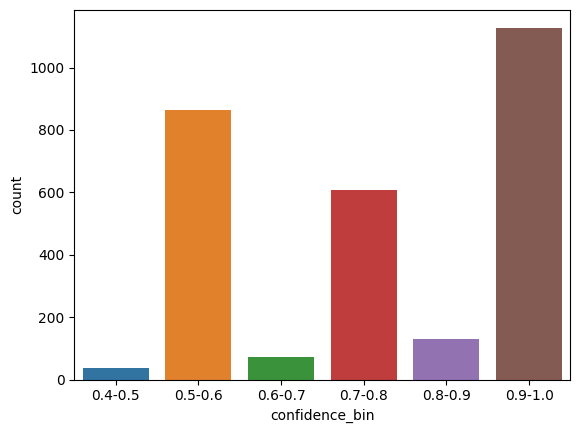

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='confidence_bin', data=df)
plt.show()

In [11]:
df['confidence_bin'].value_counts()

0.9-1.0    1128
0.5-0.6     865
0.7-0.8     609
0.8-0.9     129
0.6-0.7      71
0.4-0.5      36
Name: confidence_bin, dtype: int64

- confidence가 0.6이상인 것만 사용하기에는 0.5~0.6 구간에 있는 데이터 수가 865개로 버려지는 데이터가 너무 많아서 0.5 이상인 것만 데이터 분석에 사용하기로 결정

In [12]:
df_new = df[df['confidence'] >= 0.5]

In [13]:
len(df_new)

2836

#### 데이터 분석에 필요없는 postid, sentence_range는 제거

In [14]:
df_final = df_new.drop(labels=['post_id', 'sentence_range'], axis=1)
df_final

,subreddit,text,label,confidence,social_timestamp,confidence_bin
0,ptsd,"He said he had not felt that way before, sugge...",1,0.800000,2018-03-21 15:39:13,0.7-0.8
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,1.000000,2018-05-23 02:23:37,0.9-1.0
2,ptsd,My mom then hit me with the newspaper and it s...,1,0.800000,2018-09-03 09:46:45,0.7-0.8
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,0.600000,2018-01-20 15:25:55,0.5-0.6
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,0.800000,2018-10-18 05:43:25,0.7-0.8
...,...,...,...,...,...,...
2833,relationships,"* Her, a week ago: Precious, how are you? (I i...",0,1.000000,2018-01-06 06:17:24,0.9-1.0
2834,ptsd,I don't have the ability to cope with it anymo...,1,1.000000,2018-10-18 10:50:12,0.9-1.0
2835,anxiety,In case this is the first time you're reading ...,0,1.000000,2018-10-11 23:48:32,0.9-1.0
2836,almosthomeless,Do you find this normal? They have a good rela...,0,0.571429,2017-03-08 10:55:43,0.5-0.6


#### subreddit 별 text 개수 확인

In [15]:
df_final.groupby('subreddit')['text'].count()

subreddit
almosthomeless       80
anxiety             503
assistance          288
domesticviolence    316
food_pantry          37
homeless            168
ptsd                583
relationships       552
stress               64
survivorsofabuse    245
Name: text, dtype: int64

<Axes: >

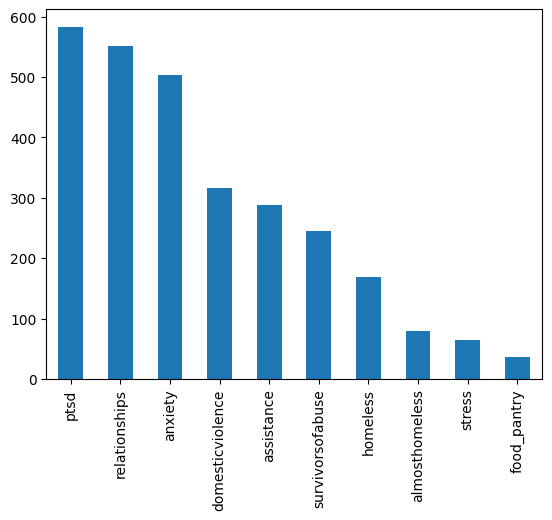

In [16]:
df_final.subreddit.value_counts().plot(kind='bar')

- 분석에 사용할 2836개의 데이터 중 57%(1638개)가 ptsd, relationships, anxiety에 존재

#### subreddit별 스트레스 여부 분포

In [17]:
df_final.groupby(['subreddit', 'label'])['text'].count().to_frame()

text
subreddit        label      
almosthomeless   0        33
                 1        47
anxiety          0       172
                 1       331
assistance       0       184
                 1       104
domesticviolence 0       114
                 1       202
food_pantry      0        23
                 1        14
homeless         0       105
                 1        63
ptsd             0       252
                 1       331
relationships    0       305
                 1       247
stress           0        29
                 1        35
survivorsofabuse 0       133
                 1       112

In [18]:
df_final.groupby(['subreddit', 'label'])['text'].count().unstack()

label,0,1
subreddit,,
almosthomeless,33,47
anxiety,172,331
assistance,184,104
domesticviolence,114,202
food_pantry,23,14
homeless,105,63
ptsd,252,331
relationships,305,247
stress,29,35


<Axes: xlabel='subreddit'>

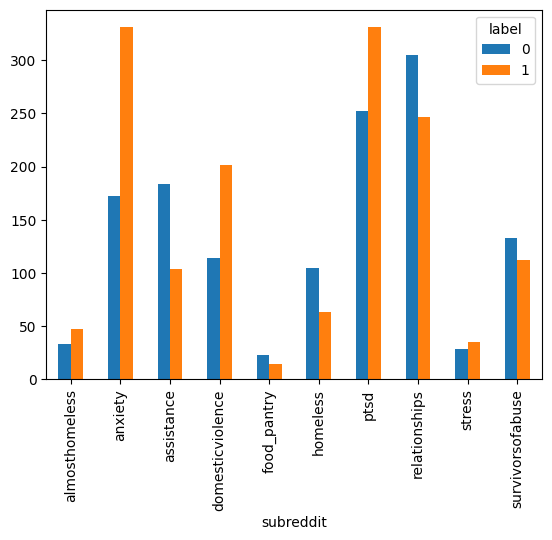

In [19]:
df_final.groupby(['subreddit', 'label'])['text'].count().unstack().plot(kind='bar')

- anxiety, ptsd, domestic violence , almost homeless, stress 게시판에서 스트레스 있는 글이 더 많은 것 확인
- 반대로 assistance, homeless, relationship, survivor of abuse, food_pantry 게시판에서는 스트레스 없는 글의 비율이 더 높은 것을 확인<br>
--> 해당 결과를 통해 불안감, 사고 후 스트레스 장애, 폭력 등 정신적, 신체적으로 힘듦을 겪고 있는 게시판에서는 스트레스 있는 글이 더 많지만, 도움이나 어려움에서 극복한 곳을 의미하는 subreddit 게시판에는 스트레스가 없는 글의 내용이 더 많은 것을 알 수 있었음 <br>
--> 의외의 결과는 almost homeless 와 homeless 게시판이 반대의 결과를 보여준다는 것 : almost homeless 게시판은 스트레스 글이 더 많은 것으로 나타났는데 homeless 게시판에서는 스트레스가 있는 글이 더 적은 것으로 확인됨

#### subreddit 별 text 평균 길이 확인

In [20]:
df_temp = df_final[['subreddit', 'text', 'label']]
df_temp

,subreddit,text,label
0,ptsd,"He said he had not felt that way before, sugge...",1
1,assistance,"Hey there r/assistance, Not sure if this is th...",0
2,ptsd,My mom then hit me with the newspaper and it s...,1
3,relationships,"until i met my new boyfriend, he is amazing, h...",1
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1
...,...,...,...
2833,relationships,"* Her, a week ago: Precious, how are you? (I i...",0
2834,ptsd,I don't have the ability to cope with it anymo...,1
2835,anxiety,In case this is the first time you're reading ...,0
2836,almosthomeless,Do you find this normal? They have a good rela...,0


In [21]:
def lentext(text):
    return len(text)

In [22]:
df_temp['text_len'] = df_temp['text'].apply(lentext)
df_temp

/tmp/ipykernel_60574/296145014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['text_len'] = df_temp['text'].apply(lentext)


,subreddit,text,label,text_len
0,ptsd,"He said he had not felt that way before, sugge...",1,571
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,588
2,ptsd,My mom then hit me with the newspaper and it s...,1,847
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,1277
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,533
...,...,...,...,...
2833,relationships,"* Her, a week ago: Precious, how are you? (I i...",0,438
2834,ptsd,I don't have the ability to cope with it anymo...,1,728
2835,anxiety,In case this is the first time you're reading ...,0,848
2836,almosthomeless,Do you find this normal? They have a good rela...,0,355


In [23]:
df_temp.describe()

,label,text_len
count,2836.000000,2836.000000
mean,0.523977,447.949224
std,0.499513,168.872669
min,0.000000,6.000000
25%,0.000000,339.000000
50%,1.000000,421.000000
75%,1.000000,528.250000
max,1.000000,1639.000000


- 제일 긴 text 길이는 1639자, 제일 짧은 text 길이는 6이고 평균 길이는 447로 나타남

In [24]:
df_temp.groupby(['subreddit'])['text_len'].mean().to_frame()

,text_len
subreddit,
almosthomeless,447.412500
anxiety,447.763419
assistance,428.625000
domesticviolence,436.512658
food_pantry,379.756757
homeless,449.851190
ptsd,435.547170
relationships,463.898551
stress,505.593750


<Axes: xlabel='subreddit'>

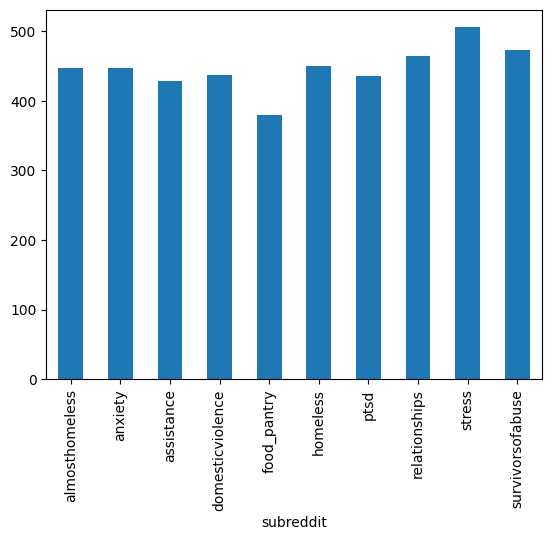

In [25]:
df_temp.groupby(['subreddit'])['text_len'].mean().plot(kind='bar')

- subreddit별 text의 평균 길이를 확인한 결과, <br> 
food_pantry게시판이 379로 평균 text 길이가 제일 짧은 편이었고, stress 게시판이 505로 text 길이가 제일 길긴 했지만 대체적으로 대부분의 게시판의 text 평균 길이가 비슷한 편

#### 연도별 게시물 수 확인

In [26]:
print(df_final['social_timestamp'].min())
print(df_final['social_timestamp'].max()) 

2017-01-01 21:36:58
2018-11-19 10:54:20


In [27]:
df_final['year'] = df_final['social_timestamp'].dt.year

In [28]:
df_final.groupby('year')['text'].count()

year
2017     868
2018    1968
Name: text, dtype: int64

<Axes: xlabel='year'>

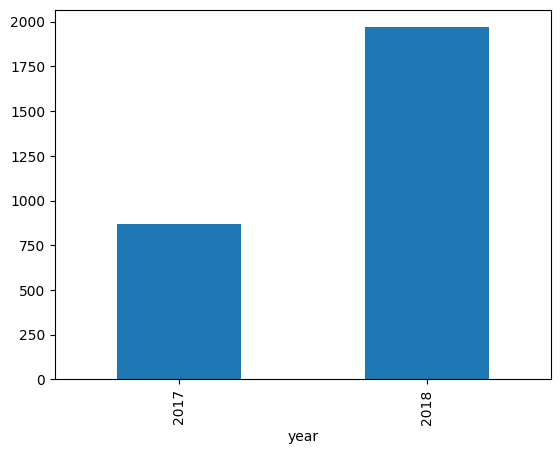

In [29]:
df_final.groupby('year')['text'].count().plot(kind='bar')

#### 연도별 스트레스 글 개수 확인

In [30]:
df_final.groupby(['year', 'label'])['text'].count().to_frame()

text
year label      
2017 0       382
     1       486
2018 0       968
     1      1000

<Axes: xlabel='year'>

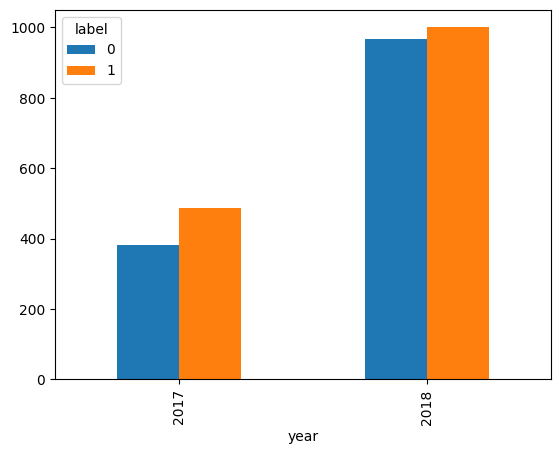

In [31]:
df_final.groupby(['year', 'label'])['text'].count().unstack().plot(kind='bar')

- 수집한 데이터는 2017년 1월 1일부터 2018년 11월 사이에 작성된 글
- 2017년에는 스트레스가 있는 글이 좀 더 많았지만 2018년엔 스트레스 있는 글, 없는 글의 양 비슷

## 전처리 전 logistic / BERT 모델 성능
- 전처리: 불용어 제거, 소문자 변환, 기호 제거 등을 의미
- 해당 섹션에서는 전처리를 하지 않고 로지스틱 모델을 돌려 스트레스 여부 예측을 진행 및 스트레스 여부 판단에 영향을 미치는 상위 단어 20개를 확인함
- 딥러닝 모델도 돌려보기 위해 BERT 이용

In [32]:
df_final

,subreddit,text,label,confidence,social_timestamp,confidence_bin,year
0,ptsd,"He said he had not felt that way before, sugge...",1,0.800000,2018-03-21 15:39:13,0.7-0.8,2018
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,1.000000,2018-05-23 02:23:37,0.9-1.0,2018
2,ptsd,My mom then hit me with the newspaper and it s...,1,0.800000,2018-09-03 09:46:45,0.7-0.8,2018
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,0.600000,2018-01-20 15:25:55,0.5-0.6,2018
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,0.800000,2018-10-18 05:43:25,0.7-0.8,2018
...,...,...,...,...,...,...,...
2833,relationships,"* Her, a week ago: Precious, how are you? (I i...",0,1.000000,2018-01-06 06:17:24,0.9-1.0,2018
2834,ptsd,I don't have the ability to cope with it anymo...,1,1.000000,2018-10-18 10:50:12,0.9-1.0,2018
2835,anxiety,In case this is the first time you're reading ...,0,1.000000,2018-10-11 23:48:32,0.9-1.0,2018
2836,almosthomeless,Do you find this normal? They have a good rela...,0,0.571429,2017-03-08 10:55:43,0.5-0.6,2017


- 텍스트와 라벨 분리

In [33]:
texts = df_final['text']
labels = df_final['label']

- 데이터 길이 확인

텍스트의 최대 길이 : 1639
텍스트의 평균 길이 : 447.94922425952046


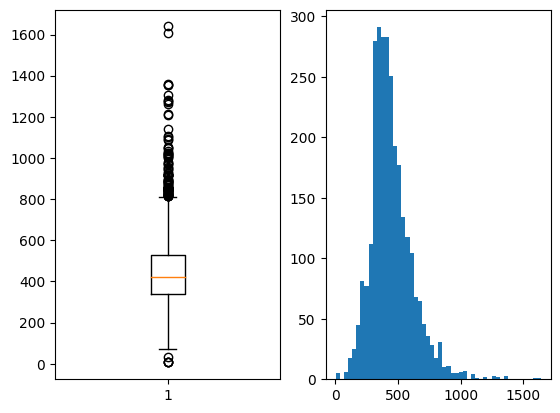

In [34]:
import numpy as np

texts_length = [len(text) for text in texts]

print('텍스트의 최대 길이 : {}'.format(np.max(texts_length)))
print('텍스트의 평균 길이 : {}'.format(np.mean(texts_length)))

plt.subplot(1,2,1)
plt.boxplot(texts_length)
plt.subplot(1,2,2)
plt.hist(texts_length, bins=50)
plt.show()

### 1) 로지스틱 회귀

In [35]:
from sklearn.linear_model import LogisticRegression
lr_tf_l1 = LogisticRegression(C=0.1, penalty='l1', solver='saga', max_iter=10000)

Train-Test split

In [36]:
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=0)

In [37]:
print(f'학습 데이터 개수: {len(train_texts)}')
print(f'테스트 데이터 개수: {len(test_texts)}')

학습 데이터 개수: 2268
테스트 데이터 개수: 568


CountVectorizer 사용

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer() 
tf_train_features = tf_vectorizer.fit_transform(train_texts) 
tf_test_features = tf_vectorizer.transform(test_texts)

In [39]:
lr_tf_l1.fit(tf_train_features, train_labels) # 학습

LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='saga')

In [40]:
pred_labels_tf_l1 = lr_tf_l1.predict(tf_test_features) # 예측

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

a = accuracy_score(test_labels, pred_labels_tf_l1)
p = precision_score(test_labels, pred_labels_tf_l1)
r =recall_score(test_labels, pred_labels_tf_l1)
f1= f1_score(test_labels, pred_labels_tf_l1)
print('Accuracy: %.2f' % a,', Precision: %.2f' % p, ', Recall: %.2f' % r, ', F1: %.2f' % f1 )


Accuracy: 0.72 , Precision: 0.70 , Recall: 0.78 , F1: 0.74


In [42]:
# 추정결과 confusion matrix
c_mat = confusion_matrix(y_true = test_labels, y_pred = pred_labels_tf_l1)
l1_report = classification_report(test_labels, pred_labels_tf_l1)
print(l1_report)

              precision    recall  f1-score   support

           0       0.74      0.66      0.69       277
           1       0.70      0.78      0.74       291

    accuracy                           0.72       568
   macro avg       0.72      0.72      0.72       568
weighted avg       0.72      0.72      0.72       568



#### 로지스틱 회귀 모형을 이용해 스트레스 여부 판단에 영향을 미치는 상위 20개의 단어 분석
- 추정 계수 사용

In [43]:
# 단어 사전 만들기
words_dict = {}
for word, index in tf_vectorizer.vocabulary_.items():
    words_dict[index]=word

In [44]:
coefficients = lr_tf_l1.coef_.tolist()
sorted_coefficients = sorted(enumerate(coefficients[0]), key=lambda x:x[1], reverse=True)

K=20
print("스트레스 있는 글 단어 상위 {} 개".format(str(K)))   # 스트레스 있음
for word_id, coef in sorted_coefficients[:K]:
    print('{0:} ({1:.3f})'.format(words_dict[word_id], coef))

print()
print("스트레스 없는 글 단어 상위 {} 개".format(str(K)))   # 스트레스가 없는
for word_id, coef in sorted_coefficients[-K:]:
    print('{0:} ({1:.3f})'.format(words_dict[word_id], coef))

스트레스 있는 글 단어 상위 20 개
tell (0.384)
hate (0.378)
fucking (0.363)
feel (0.320)
even (0.316)
do (0.269)
me (0.257)
past (0.247)
don (0.247)
no (0.239)
scared (0.237)
anxiety (0.235)
sick (0.228)
what (0.225)
just (0.221)
nothing (0.218)
myself (0.213)
because (0.205)
am (0.176)
why (0.167)

스트레스 없는 글 단어 상위 20 개
great (-0.118)
they (-0.121)
would (-0.125)
post (-0.125)
person (-0.126)
first (-0.139)
for (-0.141)
that (-0.158)
we (-0.173)
be (-0.179)
your (-0.180)
bit (-0.181)
her (-0.186)
good (-0.186)
let (-0.196)
others (-0.264)
you (-0.309)
finally (-0.325)
url (-0.486)
met (-0.533)


- 전처리 전이라서 be, that, for, don, even, do, would와 같이 의미가 없는 단어들(전치사, 조동사 등)이 상위 단어에 많이 위치해 있는 것을 알 수 있음

##### TF-IDF Vectorizer 사용

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_train_features = tfidf_vectorizer.fit_transform(train_texts)
tfidf_test_features = tfidf_vectorizer.transform(test_texts)

In [46]:
lr_tf_l1.fit(tfidf_train_features, train_labels)

LogisticRegression(C=0.1, max_iter=10000, penalty='l1', solver='saga')

In [47]:
pred_labels_tfidf_l1 = lr_tf_l1.predict(tfidf_test_features) # 예측

In [48]:
# 정확도
accuracy_score(test_labels, pred_labels_tfidf_l1)

0.5774647887323944

- TF-IDF 정확도가 CountVectorizer보다 더 낮게 나와 따로 precision, recall 등 확인하지 않고 이후 단계도 진행하지 않음

### 2) BERT 사용
- 전처리 하지 않은 상태의 text 그대로 모델에 input으로 사용

In [ ]:
import re
import random
import time
import datetime

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from scipy import stats
from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [88]:
# 버트 토크나이저
def bert_tokenize(texts):
    return [tokenizer.tokenize("[CLS] " + text + " [SEP]") for text in texts]

- BERT 모델로는 bert-base-uncased 사용

In [89]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized = bert_tokenize(texts)
bert_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized]

In [90]:
number_of_tokens = np.array([len(bert_id) for bert_id in bert_ids])

- 전처리 전 텍스트의 평균길이가 447이어서 max_len을 450으로 설정

In [91]:
MAX_LEN = 450
padded_bert_ids = pad_sequences(bert_ids, maxlen=MAX_LEN, dtype='long',
									truncating='post', padding='post')
padded_bert_ids[0]

array([  101,  2002,  2056,  2002,  2018,  2025,  2371,  2008,  2126,
        2077,  1010, 10514, 13871, 12870,  2094,  1045,  2175,  2717,
        1998,  2061,  1012,  1012,  9495,  3805,  2065,  2017,  2072,
        1005,  2128,  1037,  1044, 22571, 24163,  4859,  4360,  2278,
        2066,  2033,  1024,  1045,  5630,  2000,  2298,  2039,  1000,
        5346,  1997, 12677,  1000,  1999,  8069,  1997,  2672,  2893,
        8631,  2046,  2070, 10442,  4920,  1997, 11320, 14808, 13288,
        9714,  1010,  1037,  5236,  1000,  2024,  2017, 12663,  1000,
        3231,  2030,  2047,  2287,  1038,  1012,  1055,  1012,  1010,
        2242,  1045,  2071,  2130,  4756,  2012,  2091,  1996,  2346,
        1012,  2053,  1010,  1045,  3092,  2039,  3752,  2008,  2023,
        3168,  1997, 12677,  2064,  2022, 24668,  1997,  2536,  2740,
        9932, 13728, 11187,  1025,  2028,  1997,  2029,  1045,  2572,
       13047,  2000,  1012,  1012,  2061,  2006,  2327,  1997,  2026,
        1000, 12677,

In [92]:
# 어텐션 마스크
attention_masks = []
for seq in padded_bert_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

In [93]:
# train-test 나누기
X_train, X_test, y_train, y_test = train_test_split(padded_bert_ids, labels.values, random_state=42, test_size=0.3)

masks_train, masks_test, _, _ = train_test_split(attention_masks, padded_bert_ids, 
                                                 random_state=42, test_size=0.3)

# train-val 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1)

masks_train, masks_val, _, _ = train_test_split(masks_train, masks_train, 
                                                 random_state=42, test_size=0.1)
display(
    f"X_train: {X_train.shape}",
    f"X_val: {X_val.shape}",
    f"X_test: {X_test.shape}",
    f"y_train: {y_train.shape}",
    f"y_val: {y_val.shape}",
    f"y_test: {y_test.shape}",
    f"masks_train: {len(masks_train)}",
    f"masks_val: {len(masks_val)}",
    f"masks_test: {len(masks_test)}",
)

'X_train: (1786, 450)'

'X_val: (199, 450)'

'X_test: (851, 450)'

'y_train: (1786,)'

'y_val: (199,)'

'y_test: (851,)'

'masks_train: 1786'

'masks_val: 199'

'masks_test: 851'

In [94]:
# GPU 사용
device = 'cuda:0'
torch.cuda.is_available() # GPU 사용 가능 여부 확인 

True

In [95]:
train_inputs = torch.tensor(X_train).to(device)
train_labels = torch.tensor(y_train).to(device)
train_masks = torch.tensor(masks_train).to(device)
validation_inputs = torch.tensor(X_val).to(device)
validation_labels = torch.tensor(y_val).to(device)
validation_masks = torch.tensor(masks_val).to(device)

test_inputs = torch.tensor(X_test).to(device)
test_labels = torch.tensor(y_test).to(device)
test_masks = torch.tensor(masks_test).to(device)

print(train_inputs.shape)
print(train_labels.shape)
print(train_masks.shape)
print(validation_inputs.shape)
print(validation_labels.shape)
print(validation_masks.shape)
print(test_inputs.shape)
print(test_labels.shape)
print(test_masks.shape)

torch.Size([1786, 450])
torch.Size([1786])
torch.Size([1786, 450])
torch.Size([199, 450])
torch.Size([199])
torch.Size([199, 450])
torch.Size([851, 450])
torch.Size([851])
torch.Size([851, 450])


In [96]:
BATCH_SIZE = 4

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=BATCH_SIZE)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=BATCH_SIZE)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=BATCH_SIZE)

In [97]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to(device)

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

epochs = 4
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [98]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))
    

# 재현을 위해 랜덤시드 고정
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()
        
    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행                
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
           
        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)            

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch
        
        # 그래디언트 계산 안함
        with torch.no_grad():     
            # Forward 수행
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # 로스 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...

  Average training loss: 0.52
  Training epcoh took: 0:01:00

Running Validation...
  Accuracy: 0.85
  Validation took: 0:00:02

======== Epoch 2 / 4 ========
Training...

  Average training loss: 0.39
  Training epcoh took: 0:00:59

Running Validation...
  Accuracy: 0.88
  Validation took: 0:00:02

======== Epoch 3 / 4 ========
Training...

  Average training loss: 0.16
  Training epcoh took: 0:00:59

Running Validation...
  Accuracy: 0.85
  Validation took: 0:00:02

======== Epoch 4 / 4 ========
Training...

  Average training loss: 0.07
  Training epcoh took: 0:01:00

Running Validation...
  Accuracy: 0.85
  Validation took: 0:00:02

Training complete!


In [99]:
#시작 시간 설정
t0 = time.time()

# 평가모드로 변경
model.eval()

# 변수 초기화
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# 데이터로더에서 배치만큼 반복하여 가져옴
for step, batch in enumerate(test_dataloader):
    # 경과 정보 표시
    if step % 100 == 0 and not step == 0:
        elapsed = format_time(time.time() - t0)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

    # 배치를 GPU에 넣음
    batch = tuple(t.to(device) for t in batch)
    
    # 배치에서 데이터 추출
    b_input_ids, b_input_mask, b_labels = batch
    
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)
    
    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
       
    # 출력 로짓과 라벨을 비교하여 정확도 계산
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

print("")
print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("Test took: {:}".format(format_time(time.time() - t0)))

  Batch   100  of    213.    Elapsed: 0:00:04.
  Batch   200  of    213.    Elapsed: 0:00:08.

Accuracy: 0.79
Test took: 0:00:09


- 로지스틱 모델보다 버트 모형의 정확도가 0.79로 더 높게 나온 것 확인 <br>
사전학습 모형을 썼기 때문에 딥러닝 모델의 결과가 더 높게 나온 것으로 판단

## 전처리 후 logistic / BERT 모델 성능
- 해당 섹션에서는 전처리(영어 이외의 단어 제거, 소문자 변환, 불용어 제거, 단어 어간 추출)를 진행한 후 로지스틱 모델을 돌린 후 스트레스 판단 여부에 영향을 미치는 상위 단어 확인
- 마찬가지로 딥러닝 모델인 BERT로 예측 진행

In [49]:
# 전처리
import re
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [50]:
def data_text_cleaning(data):

    # 영문자 이외 문자는 공백으로 변환
    only_english = re.sub('[^a-zA-Z]', ' ', data)

    # 소문자 변환
    no_capitals = only_english.lower().split()

    # 불용어 제거
    stops = set(stopwords.words('english'))
    no_stops = [word for word in no_capitals if not word in stops]

    # 어간 추출
    stemmer = nltk.stem.SnowballStemmer('english')
    stemmer_words = [stemmer.stem(word) for word in no_stops]

    # 공백으로 구분된 문자열로 결합하여 결과 반환
    return ' '.join(stemmer_words)

In [51]:
texts_clean = texts.apply(data_text_cleaning)
texts_clean

0       said felt way sugget go rest trigger ahead you...
1       hey r assist sure right place post goe current...
2       mom hit newspap shock would know like play hit...
3       met new boyfriend amaz kind sweet good student...
4       octob domest violenc awar month domest violenc...
                              ...                        
2833    week ago precious ignor jan happi year preciou...
2834    abil cope anymor tri lot thing trigger shut wo...
2835    case first time read post look peopl will comp...
2836    find normal good relationship main problem see...
2837    talk mom morn said sister trauma wors mine dev...
Name: text, Length: 2836, dtype: object

텍스트의 최대 길이 : 882
텍스트의 평균 길이 : 223.94957686882933


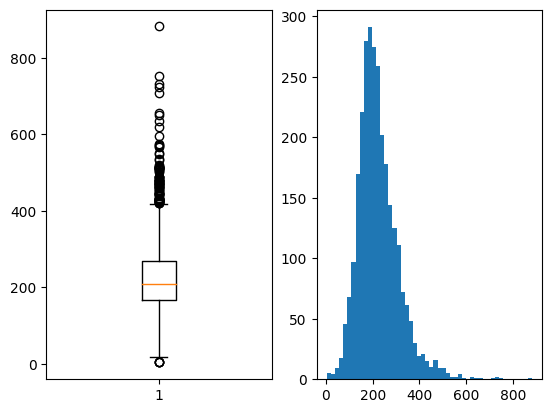

In [52]:
texts_length = [len(text) for text in texts_clean]

print('텍스트의 최대 길이 : {}'.format(np.max(texts_length)))
print('텍스트의 평균 길이 : {}'.format(np.mean(texts_length)))

plt.subplot(1,2,1)
plt.boxplot(texts_length)
plt.subplot(1,2,2)
plt.hist(texts_length, bins=50)
plt.show()

- 전처리 후 텍스트의 최대 길이가 1639에서 882로 바뀐 것 확인
- 평균 길이도 447에서 223으로 절반 정도 줄어듦

In [53]:
from sklearn.model_selection import train_test_split
train_texts, test_texts, train_labels, test_labels = train_test_split(texts_clean, labels, test_size=0.2, random_state=0)

In [54]:
print(f'학습 데이터 개수: {len(train_texts)}')
print(f'테스트 데이터 개수: {len(test_texts)}')

학습 데이터 개수: 2268
테스트 데이터 개수: 568


### 1) 로지스틱 회귀

In [55]:
from sklearn.linear_model import LogisticRegression

lr_tf_l1 = LogisticRegression(C=0.1, penalty='l1', solver='saga', max_iter=10000)

CountVectorizer 사용

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer() 
tf_train_features = tf_vectorizer.fit_transform(train_texts) 
tf_test_features = tf_vectorizer.transform(test_texts)

In [57]:
import time
start = time.time()
lr_tf_l1.fit(tf_train_features, train_labels) # 학습
end = time.time()
elapsed = end - start 
print('\nLearning time: {0:.3f} seconds'.format(elapsed))


Learning time: 0.426 seconds


In [58]:
pred_labels_tf_l1 = lr_tf_l1.predict(tf_test_features) # 예측

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

a = accuracy_score(test_labels, pred_labels_tf_l1)
p = precision_score(test_labels, pred_labels_tf_l1)
r =recall_score(test_labels, pred_labels_tf_l1)
f1= f1_score(test_labels, pred_labels_tf_l1)
print('Accuracy: %.2f' % a,', Precision: %.2f' % p, ', Recall: %.2f' % r, ', F1: %.2f' % f1 )

print()

# 추정결과 confusion matrix
c_mat = confusion_matrix(y_true = test_labels, y_pred = pred_labels_tf_l1)
l1_report = classification_report(test_labels, pred_labels_tf_l1)
print(l1_report)

Accuracy: 0.69 , Precision: 0.69 , Recall: 0.72 , F1: 0.70

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       277
           1       0.69      0.72      0.70       291

    accuracy                           0.69       568
   macro avg       0.69      0.69      0.69       568
weighted avg       0.69      0.69      0.69       568



#### 로지스틱 회귀 모형을 이용해 스트레스 여부 판단에 영향을 미치는 상위 20개 단어 분석
- 전처리 전과 마찬가지로 전처리 후에 두 집단 간 단어 빈도수 파악 
- 추정 계수 사용

In [60]:
# 단어 사전 만들기
words_dict2 = {}
for word, index in tf_vectorizer.vocabulary_.items():
    words_dict2[index]=word

In [61]:
coefficients = lr_tf_l1.coef_.tolist()
sorted_coefficients = sorted(enumerate(coefficients[0]), key=lambda x:x[1], reverse=True)

K=20
print("스트레스 있는 글 단어 상위 {} 개".format(str(K)))   # 스트레스 있음
for word_id, coef in sorted_coefficients[:K]:
    print('{0:} ({1:.3f})'.format(words_dict2[word_id], coef))

print()
print("스트레스 없는 글 단어 상위 {} 개".format(str(K)))   # 스트레스가 없는
for word_id, coef in sorted_coefficients[-K:]:
    print('{0:} ({1:.3f})'.format(words_dict2[word_id], coef))

스트레스 있는 글 단어 상위 20 개
scare (0.568)
hate (0.555)
fuck (0.443)
feel (0.437)
sick (0.436)
even (0.387)
cri (0.357)
tell (0.356)
anxieti (0.293)
know (0.262)
attack (0.261)
happen (0.237)
noth (0.235)
get (0.228)
abus (0.222)
trigger (0.188)
stop (0.188)
past (0.186)
dr (0.186)
school (0.182)

스트레스 없는 글 단어 상위 20 개
share (-0.117)
see (-0.120)
studi (-0.129)
person (-0.165)
way (-0.180)
support (-0.200)
togeth (-0.203)
would (-0.205)
good (-0.206)
guy (-0.225)
first (-0.236)
final (-0.250)
love (-0.263)
post (-0.267)
survey (-0.301)
experi (-0.317)
other (-0.319)
thank (-0.471)
met (-0.628)
url (-0.675)


- 전처리를 한 후 상위 단어를 확인하니 전처리 전보다 좀 더 명확한 단어들(ex. 명사, 형용사 등)이 더 많이 분포해 있는 것 확인

### 2) BERT

In [77]:
import re
import random
import time
import datetime

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from scipy import stats
from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [80]:
# 버트 토크나이저
def bert_tokenize(texts):
    return [tokenizer.tokenize("[CLS] " + text + " [SEP]") for text in texts]

- bert-base-uncased 모델 사용

In [81]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized = bert_tokenize(texts_clean)
bert_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized]

In [82]:
number_of_tokens = np.array([len(bert_id) for bert_id in bert_ids])
stats.describe(number_of_tokens)

DescribeResult(nobs=2802, minmax=(3, 209), mean=53.43504639543183, variance=424.1223414651798, skewness=1.3587061290636693, kurtosis=4.2623467645622135)

- 전처리 후 평균 길이가 223이라서 max_len을 250으로 설정

In [83]:
MAX_LEN = 250
padded_bert_ids = pad_sequences(bert_ids, maxlen=MAX_LEN, dtype='long',
									truncating='post', padding='post')
padded_bert_ids[0]

array([  101,  2056,  2371,  2126, 10514, 13871,  3388,  2175,  2717,
        9495,  3805,  2017,  2072,  1044, 22571, 24163,  4859,  4360,
        2278,  2066, 11703,  3593,  2298,  2514, 12677,  3246,  2089,
        2497,  2131, 11891, 10442,  4920, 11320, 14808,  2099,  9530,
       13102,  7895,  6895,  5236, 12663,  3231,  2047,  2287,  1038,
        2070,  2705,  2071,  2130,  4756,  2346,  2203,  3191, 12411,
        2015, 12677, 27427,  2594,  2536,  2740,  9932, 13728,  4765,
        2028, 13047,  2327, 12677, 24067,  1042,  1050, 24185, 18752,
        2540,  4148,  6887,  7274,  2594,  3178,   102,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [84]:
# 어텐션 마스크
attention_masks = []
for seq in padded_bert_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

In [85]:
# train-test 나누기
X_train, X_test, y_train, y_test = train_test_split(padded_bert_ids, labels.values, random_state=42, test_size=0.3)

masks_train, masks_test, _, _ = train_test_split(attention_masks, padded_bert_ids, 
                                                 random_state=42, test_size=0.3)

# train-val 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.1)

masks_train, masks_val, _, _ = train_test_split(masks_train, masks_train, 
                                                 random_state=42, test_size=0.1)
display(
    f"X_train: {X_train.shape}",
    f"X_val: {X_val.shape}",
    f"X_test: {X_test.shape}",
    f"y_train: {y_train.shape}",
    f"y_val: {y_val.shape}",
    f"y_test: {y_test.shape}",
    f"masks_train: {len(masks_train)}",
    f"masks_val: {len(masks_val)}",
    f"masks_test: {len(masks_test)}",
)

'X_train: (1764, 250)'

'X_val: (197, 250)'

'X_test: (841, 250)'

'y_train: (1764,)'

'y_val: (197,)'

'y_test: (841,)'

'masks_train: 1764'

'masks_val: 197'

'masks_test: 841'

In [87]:
device = 'cuda:0'

In [88]:
train_inputs = torch.tensor(X_train).to(device)
train_labels = torch.tensor(y_train).to(device)
train_masks = torch.tensor(masks_train).to(device)
validation_inputs = torch.tensor(X_val).to(device)
validation_labels = torch.tensor(y_val).to(device)
validation_masks = torch.tensor(masks_val).to(device)

test_inputs = torch.tensor(X_test).to(device)
test_labels = torch.tensor(y_test).to(device)
test_masks = torch.tensor(masks_test).to(device)

print(train_inputs.shape)
print(train_labels.shape)
print(train_masks.shape)
print(validation_inputs.shape)
print(validation_labels.shape)
print(validation_masks.shape)
print(test_inputs.shape)
print(test_labels.shape)
print(test_masks.shape)

torch.Size([1764, 250])
torch.Size([1764])
torch.Size([1764, 250])
torch.Size([197, 250])
torch.Size([197])
torch.Size([197, 250])
torch.Size([841, 250])
torch.Size([841])
torch.Size([841, 250])


In [89]:
BATCH_SIZE = 4

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=BATCH_SIZE)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=BATCH_SIZE)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=BATCH_SIZE)

In [90]:
torch.cuda.is_available() 

True

In [93]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2).to(device)

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

epochs = 4
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

- 학습

In [94]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))
    

# 재현을 위해 랜덤시드 고정
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()
        
    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행                
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
           
        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)            

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch
        
        # 그래디언트 계산 안함
        with torch.no_grad():     
            # Forward 수행
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # 로스 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...

  Average training loss: 0.64
  Training epcoh took: 0:00:34

Running Validation...
  Accuracy: 0.71
  Validation took: 0:00:01

======== Epoch 2 / 4 ========
Training...

  Average training loss: 0.54
  Training epcoh took: 0:00:34

Running Validation...
  Accuracy: 0.75
  Validation took: 0:00:01

======== Epoch 3 / 4 ========
Training...

  Average training loss: 0.45
  Training epcoh took: 0:00:34

Running Validation...
  Accuracy: 0.76
  Validation took: 0:00:01

======== Epoch 4 / 4 ========
Training...

  Average training loss: 0.26
  Training epcoh took: 0:00:34

Running Validation...
  Accuracy: 0.74
  Validation took: 0:00:01

Training complete!


In [95]:
#시작 시간 설정
t0 = time.time()

# 평가모드로 변경
model.eval()

# 변수 초기화
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# 데이터로더에서 배치만큼 반복하여 가져옴
for step, batch in enumerate(test_dataloader):
    # 경과 정보 표시
    if step % 100 == 0 and not step == 0:
        elapsed = format_time(time.time() - t0)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

    # 배치를 GPU에 넣음
    batch = tuple(t.to(device) for t in batch)
    
    # 배치에서 데이터 추출
    b_input_ids, b_input_mask, b_labels = batch
    
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)
    
    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
       
    # 출력 로짓과 라벨을 비교하여 정확도 계산
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

print("")
print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("Test took: {:}".format(format_time(time.time() - t0)))

  Batch   100  of    211.    Elapsed: 0:00:02.
  Batch   200  of    211.    Elapsed: 0:00:04.

Accuracy: 0.75
Test took: 0:00:04


- BERT의 경우, 전처리 전과 후의 가장 큰 차이점은 전처리 전에는 max_len을 450으로, 전처리 후에는 max_len을 250으로 설정하여 텍스트의 길이가 절반으로 줄어들었다는 것이었는데 <br>
전처리 전 BERT 모델을 돌렸을 때의 모델의 성능이 0.79로 전처리 후(0.75)보다 0.04정도 더 높은 것으로 확인 <br>
이러한 성능의 차이는 모델에 input으로 들어가는 텍스트의 길이가 영향을 미친 것으로 보이며, 길이가 길수록 학습에 사용되는 단어가 많아지다보니 이러한 결과가 나타난 것으로 생각됨.

## 전처리 후 스트레스 있는 그룹과 없는 그룹의 text 단어 빈도분석 및 시각화

In [62]:
df_new = df[['subreddit', 'text', 'label']]
df_new

,subreddit,text,label
0,ptsd,"He said he had not felt that way before, sugge...",1
1,assistance,"Hey there r/assistance, Not sure if this is th...",0
2,ptsd,My mom then hit me with the newspaper and it s...,1
3,relationships,"until i met my new boyfriend, he is amazing, h...",1
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1
...,...,...,...
2833,relationships,"* Her, a week ago: Precious, how are you? (I i...",0
2834,ptsd,I don't have the ability to cope with it anymo...,1
2835,anxiety,In case this is the first time you're reading ...,0
2836,almosthomeless,Do you find this normal? They have a good rela...,0


In [63]:
import re
import nltk
from nltk.corpus import stopwords

def data_text_cleaning(data):

    # 영문자 이외 문자는 공백으로 변환
    only_english = re.sub('[^a-zA-Z]', ' ', data)

    # 소문자 변환
    no_capitals = only_english.lower().split()

    # 불용어 제거
    stops = set(stopwords.words('english'))
    no_stops = [word for word in no_capitals if not word in stops]

    # 어간 추출
    #stemmer = nltk.stem.SnowballStemmer('english')
    #stemmer_words = [stemmer.stem(word) for word in no_stops]

    # 공백으로 구분된 문자열로 결합하여 결과 반환
    return ' '.join(no_stops)

In [64]:
df_new['text'] = df_new['text'].apply(data_text_cleaning)
df_new

/tmp/ipykernel_60574/4034983702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['text'] = df_new['text'].apply(data_text_cleaning)


,subreddit,text,label
0,ptsd,said felt way suggeted go rest trigger ahead y...,1
1,assistance,hey r assistance sure right place post goes cu...,0
2,ptsd,mom hit newspaper shocked would knows like pla...,1
3,relationships,met new boyfriend amazing kind sweet good stud...,1
4,survivorsofabuse,october domestic violence awareness month dome...,1
...,...,...,...
2833,relationships,week ago precious ignored jan happy year preci...,0
2834,ptsd,ability cope anymore trying lot things trigger...,1
2835,anxiety,case first time reading post looking people wi...,0
2836,almosthomeless,find normal good relationship main problem see...,0


In [65]:
x_dep = df_new[df_new['label'] == 0]  # 스트레스가 없는 집단
o_dep = df_new[df_new['label'] == 1]  # 스트레스가 있는 집단

In [66]:
x_dep_texts = x_dep['text']
o_dep_texts = o_dep['text']

In [67]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sjkim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

- word tokenizer

In [68]:
x_word_tokens = [nltk.word_tokenize(w) for w in x_dep_texts.tolist()]
o_word_tokens = [nltk.word_tokenize(w) for w in o_dep_texts.tolist()]

- 품사 태깅(pos tagging)

In [69]:
o_word_tokens_flatten = []

for x in o_word_tokens:
    for y in x:
        o_word_tokens_flatten.append(y)

x_word_tokens_flatten = [] 

for x in x_word_tokens:
    for y in x:
        x_word_tokens_flatten.append(y)

In [70]:
print(len(o_word_tokens_flatten))
print(len(x_word_tokens_flatten))

57813
50596


In [71]:
o_tokens_pos = nltk.pos_tag(o_word_tokens_flatten)
x_tokens_pos = nltk.pos_tag(x_word_tokens_flatten)
print(o_tokens_pos[:10])
print(x_tokens_pos[:10])

[('said', 'VBD'), ('felt', 'JJ'), ('way', 'NN'), ('suggeted', 'VBD'), ('go', 'VBP'), ('rest', 'RB'), ('trigger', 'RB'), ('ahead', 'RB'), ('youi', 'JJ'), ('hypocondriac', 'NNS')]
[('hey', 'NN'), ('r', 'VBP'), ('assistance', 'NN'), ('sure', 'JJ'), ('right', 'JJ'), ('place', 'NN'), ('post', 'NN'), ('goes', 'VBZ'), ('currently', 'RB'), ('student', 'JJ')]


##### 명사, 형용사, 동사 추출

In [73]:
# 스트레스 있는 집단
o_selected_words = []
for word, pos in o_tokens_pos:
    if pos in ['NN', 'JJ', 'VB']:
        o_selected_words.append(word)
print(o_selected_words[:30]) # 단어 일부만 확인

['felt', 'way', 'youi', 'decide', 'doom', 'rabbit', 'hole', 'ludicrous', 'conspiracy', 'stupid', 'psychic', 'test', 'new', 'age', 'b', 'something', 'laugh', 'road', 'reading', 'sense', 'doom', 'various', 'health', 'prone', 'top', 'doom', 'gloom', 'f', 'worried', 'heart']


In [74]:
# 스트레스 없는 집단
x_selected_words = []
for word, pos in x_tokens_pos:
    if pos in ['NN', 'JJ', 'VB']:
        x_selected_words.append(word)
print(x_selected_words[:30]) # 단어 일부만 확인

['hey', 'assistance', 'sure', 'right', 'place', 'post', 'student', 'intern', 'sandia', 'national', 'labs', 'survey', 'help', 'improve', 'marketing', 'outreach', 'many', 'country', 'current', 'undergrad', 'grad', 'stem', 'student', 'stem', 'appreciate', 'help', 'take', 'pass', 'short', 'survey']


- lemmatizer(원형) 찾기
- nltk에서 제공되는 WordNetLemmatizer을 이용
- ex) 명사의 경우는 보통 복수 -> 단수 형태로 변형

In [75]:
# 스트레스 있는 집단
wlem = nltk.WordNetLemmatizer()
o_lemmatized_words = []
for word in o_selected_words:
    new_word = wlem.lemmatize(word)
    o_lemmatized_words.append(new_word)

#print(o_lemmatized_words)

In [76]:
# 스트레스 없는 집단
wlemm = nltk.WordNetLemmatizer()
x_lemmatized_words = []
for word in x_selected_words:
    new_word = wlemm.lemmatize(word)
    x_lemmatized_words.append(new_word)

#print(x_lemmatized_words)

- stopword 제거

In [77]:
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
o_unique_NN_words = set(o_lemmatized_words)
x_unique_NN_words = set(x_lemmatized_words)
o_final_NN_words = o_lemmatized_words
x_final_NN_words = x_lemmatized_words

# 불용어 제거
for word in o_final_NN_words:
    if word in stopwords_list:
        while word in o_final_NN_words: o_final_NN_words.remove(word)

for word in x_final_NN_words:
    if word in stopwords_list:
        while word in x_final_NN_words: x_final_NN_words.remove(word)

- 워드클라우드

In [78]:
from collections import Counter

oc = Counter(o_final_NN_words)
xc = Counter(x_final_NN_words)

In [79]:
o_top30 = oc.most_common(30)
print(f'스트레스 있는 집단의 단어 빈도수 상위 30개: \n {o_top30}')

스트레스 있는 집단의 단어 빈도수 상위 30개: 
 [('time', 417), ('feel', 414), ('get', 412), ('anxiety', 294), ('help', 267), ('day', 229), ('life', 228), ('work', 214), ('something', 203), ('family', 180), ('job', 175), ('go', 170), ('anyone', 168), ('bad', 162), ('year', 152), ('anything', 149), ('much', 148), ('know', 147), ('way', 141), ('last', 141), ('home', 138), ('good', 130), ('relationship', 129), ('everything', 126), ('lot', 125), ('someone', 124), ('money', 119), ('talk', 117), ('school', 115), ('nothing', 112)]


#### 1) 스트레스 있는 사람들의 글에서 많이 나온 단어들 시각화

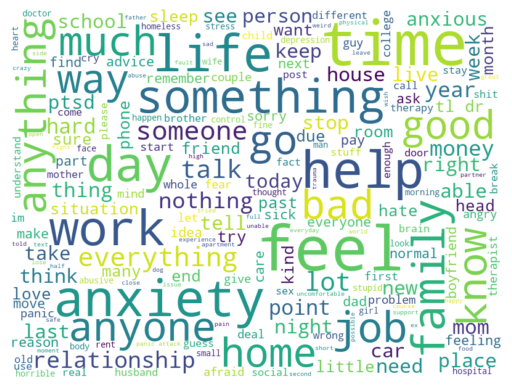

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 스트레스 있는 사람들
o_total_words = ' '.join(o_final_NN_words) # 문자열을 띄어쓰기 기준으로 연결해서 하나의 문자열 값으로 만들기
wordcloud1 = WordCloud(max_font_size=100, width=800, height=600, background_color='white')
wordcloud1.generate(o_total_words)
plt.figure()
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

- anxiety, help, bad와 같은 단어 빈도수가 높은 것 확인 가능

#### 2) 스트레스 없는 사람들의 글에서 많이 나온 단어들 시각화

In [81]:
x_top30 = xc.most_common(30)
print(f'스트레스 없는 집단의 단어 빈도수 상위 30개: \n {x_top30}')

스트레스 없는 집단의 단어 빈도수 상위 30개: 
 [('time', 355), ('get', 280), ('help', 210), ('life', 156), ('good', 148), ('day', 148), ('work', 146), ('way', 144), ('year', 143), ('something', 133), ('relationship', 132), ('feel', 129), ('much', 126), ('person', 125), ('family', 123), ('know', 122), ('anyone', 121), ('anything', 119), ('someone', 116), ('url', 115), ('take', 111), ('first', 111), ('go', 108), ('last', 107), ('home', 101), ('anxiety', 99), ('job', 99), ('talk', 97), ('lot', 95), ('little', 95)]


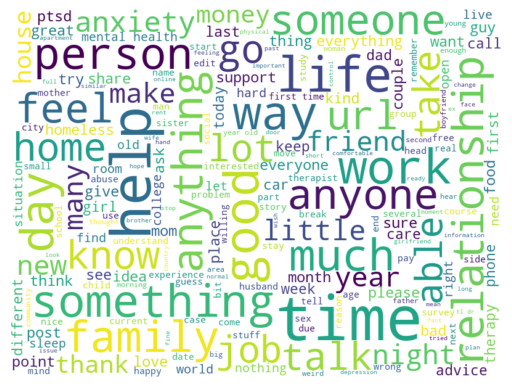

In [82]:
# 스트레스 없는 사람들
x_total_words = ' '.join(x_final_NN_words) # 문자열을 띄어쓰기 기준으로 연결해서 하나의 문자열 값으로 만들기
wordcloud2 = WordCloud(max_font_size=100, width=800, height=600, background_color='white')
wordcloud2.generate(x_total_words)
plt.figure()
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

- something, anything, life, good 등의 단어가 많이 등장. 스트레스 없는 집단과 다르게 부정적인 단어가 많이 등장하지 않음
- anxiety단어가 등장하긴 하지만 그 빈도수가 스트레스 있는 집단에 비해 현저히 작은 것 확인 가능

<br>
--> 두 집단 모두 help라는 단어가 많이 등장했지만, 스트레스가 있는/없는 집단이라는 점을 고려하면 스트레스가 있는 집단에서 등장한 help는 누군가 자신을 도와주었으면 하는 마음에서 쓰인 단어일 가능성이 있고, 스트레스가 없는 집단에서 등장한 help는 도움을 줄 수 있다는 의미에서 사용된 단어일 가능성이 있다고 생각됨. +) 'url' 이라는 단어도 스트레스가 없는 집단에서 많이 등장했다는 점을 고려한다면 url 링크와 함께 도움을 줄 수 있는 사이트를 같이 제공한 것이 아닐까 생각된다.

이미지 파일로 저장

In [137]:
wordcloud1.to_file("/home/sjkim/IoT_final/stress_group.png")
wordcloud2.to_file("/home/sjkim/IoT_final/nostress_group.png")

##### 이번에는 형용사만 추출해서 집단 간 단어 비교 분석

In [83]:
# 스트레스 있는 집단
o_selected_adj_words = []
for word, pos in o_tokens_pos:
    if pos in ['JJ']:
        o_selected_adj_words.append(word)
print(o_selected_adj_words[:30]) # 단어 일부만 확인

['felt', 'youi', 'decide', 'ludicrous', 'stupid', 'psychic', 'new', 'various', 'worried', 'physical', 'new', 'th', 'high', 'new', 'sweet', 'good', 'dont', 'ex', 'ex', 'didnt', 'touch', 'bad', 'ok', 'dont', 'new', 'ok', 'ex', 'good', 'crazy', 'wont']


In [84]:
# 스트레스 없는 집단
x_selected_adj_words = []
for word, pos in x_tokens_pos:
    if pos in ['JJ']:
        x_selected_adj_words.append(word)
print(x_selected_adj_words[:30]) # 단어 일부만 확인

['sure', 'right', 'student', 'intern', 'sandia', 'national', 'many', 'current', 'undergrad', 'short', 'big', 'exist', 'tried', 'update', 'child', 'right', 'texted', 'wanted', 'couple', 'strong', 'future', 'cared', 'open', 'softball', 'url', 'actual', 'fancy', 'much', 'know', 'outside']


- 원형 찾기

In [85]:
# 스트레스 있는 집단
wlem = nltk.WordNetLemmatizer()
o_adj_lemmatized_words = []
for word in o_selected_adj_words:
    new_word = wlem.lemmatize(word)
    o_adj_lemmatized_words.append(new_word)

#print(o_adj_lemmatized_words)

In [86]:
# 스트레스 없는 집단
wlemm = nltk.WordNetLemmatizer()
x_adj_lemmatized_words = []
for word in x_selected_adj_words:
    new_word = wlemm.lemmatize(word)
    x_adj_lemmatized_words.append(new_word)

#print(x_adj_lemmatized_words)

- 불용어 제거

In [87]:
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
o_unique_adj_words = set(o_adj_lemmatized_words)
x_unique_adj_words = set(x_adj_lemmatized_words)
o_final_adj_words = o_adj_lemmatized_words
x_final_adj_words = x_adj_lemmatized_words

# 불용어 제거
for word in o_final_adj_words:
    if word in stopwords_list:
        while word in o_final_adj_words: o_final_adj_words.remove(word)

for word in x_final_adj_words:
    if word in stopwords_list:
        while word in x_final_adj_words: x_final_adj_words.remove(word)

- 워드클라우드

In [88]:
from collections import Counter

adj_oc = Counter(o_final_adj_words)
adj_xc = Counter(x_final_adj_words)

#### 1) 스트레스 있는 그룹

In [89]:
adj_o_top30 = adj_oc.most_common(30)
print(f'스트레스 있는 그룹 형용사 빈도수 상위 30개: \n {adj_o_top30}')

스트레스 있는 그룹 형용사 빈도수 상위 30개: 
 [('bad', 162), ('much', 148), ('last', 141), ('good', 126), ('hard', 98), ('able', 98), ('new', 92), ('anxious', 80), ('little', 77), ('old', 74), ('live', 74), ('sure', 73), ('right', 72), ('first', 72), ('know', 70), ('next', 68), ('due', 68), ('many', 66), ('past', 58), ('normal', 56), ('panic', 55), ('angry', 54), ('social', 54), ('wrong', 50), ('long', 50), ('want', 50), ('sick', 50), ('mental', 49), ('sleep', 48), ('abusive', 47)]


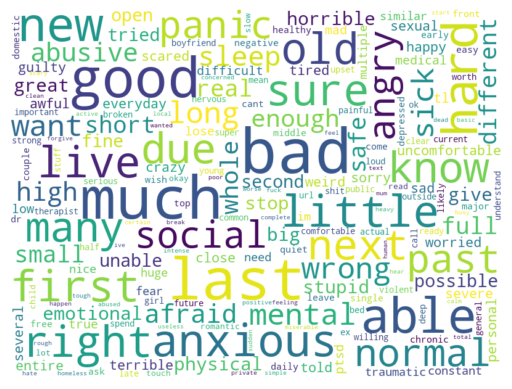

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 스트레스 있는 사람들
o_adj_total_words = ' '.join(o_final_adj_words) # 문자열을 띄어쓰기 기준으로 연결해서 하나의 문자열 값으로 만들기
wordcloud3 = WordCloud(max_font_size=100, width=800, height=600, background_color='white')
wordcloud3.generate(o_adj_total_words)
plt.figure()
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 2) 스트레스 없는 그룹

In [90]:
adj_x_top30 = adj_xc.most_common(30)
print(f'스트레스 없는 그룹 형용사 빈도수 상위 30개: \n {adj_x_top30}')

스트레스 없는 그룹 형용사 빈도수 상위 30개: 
 [('good', 137), ('much', 126), ('first', 111), ('last', 107), ('url', 102), ('little', 95), ('able', 91), ('new', 88), ('old', 84), ('many', 81), ('sure', 65), ('next', 65), ('mental', 63), ('great', 61), ('bad', 60), ('long', 55), ('free', 51), ('different', 51), ('know', 49), ('hard', 46), ('live', 46), ('want', 44), ('nice', 40), ('open', 39), ('small', 38), ('social', 38), ('short', 36), ('interested', 36), ('happy', 36), ('big', 35)]


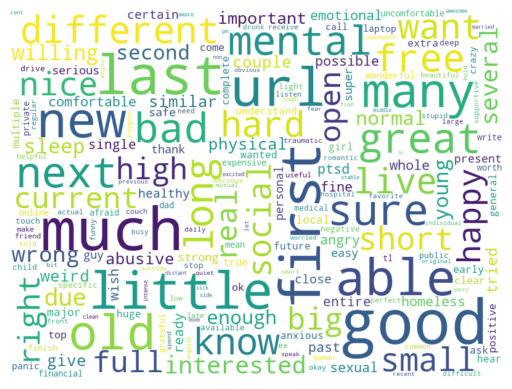

In [31]:
# 스트레스 없는 사람들
x_adj_total_words = ' '.join(x_final_adj_words) # 문자열을 띄어쓰기 기준으로 연결해서 하나의 문자열 값으로 만들기
wordcloud4 = WordCloud(max_font_size=100, width=800, height=600, background_color='white')
wordcloud4.generate(x_adj_total_words)
plt.figure()
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

- 이미지 파일로 저장

In [25]:
wordcloud3.to_file("/home/sjkim/IoT_final/adj_stress_group.png")
wordcloud4.to_file("/home/sjkim/IoT_final/adj_nostress_group.png")

## 전저리 후 subreddit 별 text 단어 빈도 분석

- 총 10개의 subreddit 중 게시물 수가 가장 많았던 ptsd, relationships, anxiety 게시판의 text 단어 빈도 분석 진행

1. PTSD

In [91]:
ptsd = df_new[df_new['subreddit'] == 'ptsd']
ptsd

,subreddit,text,label
0,ptsd,said felt way suggeted go rest trigger ahead y...,1
2,ptsd,mom hit newspaper shocked would knows like pla...,1
22,ptsd,work dodgy situations abroad number times life...,1
23,ptsd,switch blade open arms sweater vest covers rag...,0
25,ptsd,anything goes wrong sexually want cease exist ...,1
...,...,...,...
2810,ptsd,hello support subs last four months helpful th...,0
2814,ptsd,speak finally managed say bag get bag able hel...,1
2823,ptsd,know rules say self fundraising posts thought ...,0
2834,ptsd,ability cope anymore trying lot things trigger...,1


- 토큰화

In [92]:
ptsd_word_tokens = [nltk.word_tokenize(w) for w in ptsd['text'].tolist()]

In [93]:
ptsd_word_tokens_flatten = []

for x in ptsd_word_tokens:
    for y in x:
        ptsd_word_tokens_flatten.append(y)

- 품사 태깅

In [94]:
ptsd_tokens_pos = nltk.pos_tag(ptsd_word_tokens_flatten)

- 명사, 형용사만 추출

In [95]:
ptsd_selected_words = []
for word, pos in ptsd_tokens_pos:
    if pos in ['NN', 'JJ']:
        ptsd_selected_words.append(word)
print(ptsd_selected_words[:30]) # 단어 일부만 확인

['felt', 'way', 'youi', 'decide', 'doom', 'rabbit', 'hole', 'ludicrous', 'conspiracy', 'stupid', 'psychic', 'test', 'new', 'age', 'b', 'something', 'road', 'reading', 'sense', 'doom', 'various', 'health', 'prone', 'top', 'doom', 'gloom', 'f', 'worried', 'heart', 'physical']


- 원형 추출

In [96]:
wlem = nltk.WordNetLemmatizer()
ptsd_lemmatized_words = []
for word in ptsd_selected_words:
    new_word = wlem.lemmatize(word)
    ptsd_lemmatized_words.append(new_word)

In [97]:
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
ptsd_unique_words = set(ptsd_lemmatized_words)
ptsd_final_words = ptsd_lemmatized_words

# 불용어 제거
for word in ptsd_final_words:
    if word in stopwords_list:
        while word in ptsd_final_words: ptsd_final_words.remove(word)

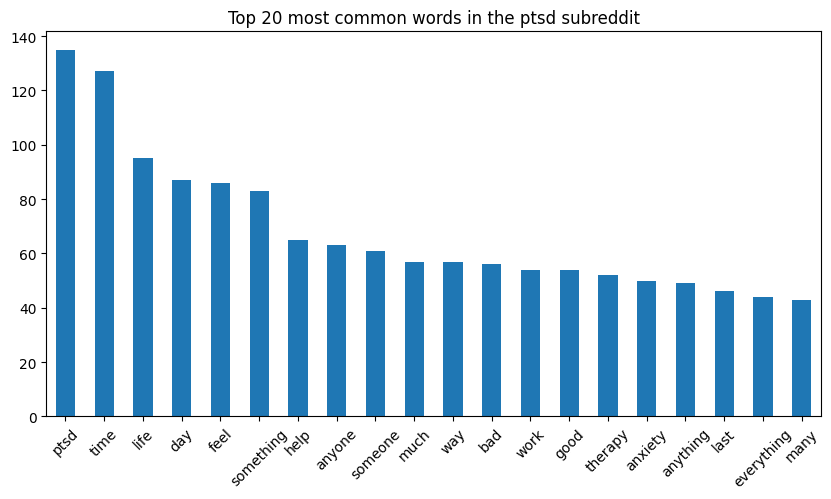

In [57]:
from wordcloud import WordCloud
ptsd_freq = pd.Series(ptsd_final_words).value_counts()
ptsd_freq[:20].plot(kind='bar', title='Top 20 most common words in the ptsd subreddit', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

2. Relationships

In [98]:
relationships = df_new[df_new['subreddit'] == 'relationships']
relationships

,subreddit,text,label
3,relationships,met new boyfriend amazing kind sweet good stud...,1
5,relationships,think want put effort relationship work diffic...,1
8,relationships,actually give assistant half emergency fee com...,1
15,relationships,asked three time happened third time cried wen...,1
19,relationships,plans move together fancy month home would con...,0
...,...,...,...
2824,relationships,even hated hate enough good friends life affor...,1
2825,relationships,background paul met years ago okcupid hit righ...,0
2830,relationships,feel like someone older current age dating age...,0
2832,relationships,get drop bomb gf coming honest totally makes w...,1


In [100]:
# tokenizer
relationships_word_tokens = [nltk.word_tokenize(w) for w in relationships['text'].tolist()]
relationships_word_tokens_flatten = []

for x in relationships_word_tokens:
    for y in x:
        relationships_word_tokens_flatten.append(y)

# 품사태깅
relationships_tokens_pos = nltk.pos_tag(relationships_word_tokens_flatten)

# 명사, 형용사 추출
relationships_selected_words = []
for word, pos in relationships_tokens_pos:
    if pos in ['NN', 'JJ']:
        relationships_selected_words.append(word)
print(relationships_selected_words[:30])  # 단어 일부만 확인

# 원형 추출
wlem = nltk.WordNetLemmatizer()
relationships_lemmatized_words = []
for word in relationships_selected_words:
    new_word = wlem.lemmatize(word)
    relationships_lemmatized_words.append(new_word)

# 불용어 제거
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
relationships_unique_words = set(relationships_lemmatized_words)
relationships_final_words = relationships_lemmatized_words

for word in relationships_final_words:
    if word in stopwords_list:
        while word in relationships_final_words: relationships_final_words.remove(word)


['new', 'boyfriend', 'kind', 'sweet', 'good', 'student', 'family', 'dont', 'feel', 'passion', 'rush', 'ex', 'truth', 'boyfriend', 'ex', 'didnt', 'feel', 'nothing', 'touch', 'feel', 'bad', 'didnt', 'nothing', 'love', 'ok', 'hurt', 'course', 'problem', 'im', 'dont']


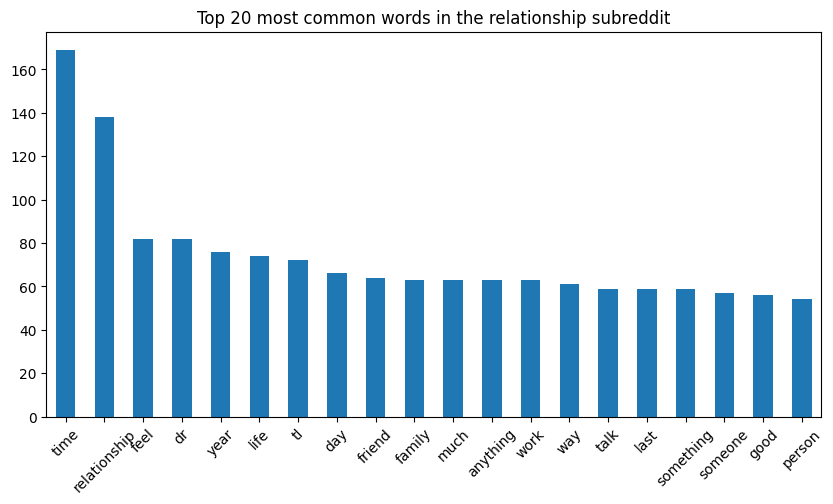

In [58]:
from wordcloud import WordCloud

relationship_freq = pd.Series(relationships_final_words).value_counts()
relationship_freq[:20].plot(kind='bar', title='Top 20 most common words in the relationship subreddit', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

3. Anxiety

In [101]:
anxiety = df_new[df_new['subreddit'] == 'anxiety']
anxiety

,subreddit,text,label
7,anxiety,cleared okay monday thinking humans brain work...,1
10,anxiety,next week flying family vacation flights long ...,1
11,anxiety,everything sets almost panic attack going dads...,1
12,anxiety,taking mgs zoloft months yeah super small dose...,1
14,anxiety,past couple months worst anxiety gotten bad ef...,1
...,...,...,...
2818,anxiety,shown disappointment sees get frustrated lays ...,1
2819,anxiety,sucks booking plane tickets next wednesday hal...,1
2821,anxiety,want anxious drawing class supposed escape one...,1
2831,anxiety,hey come middle class family study far away pa...,1


In [102]:
# tokenizer
anxiety_word_tokens = [nltk.word_tokenize(w) for w in anxiety['text'].tolist()]
anxiety_word_tokens_flatten = []

for x in anxiety_word_tokens:
    for y in x:
        anxiety_word_tokens_flatten.append(y)

# 품사태깅
anxiety_tokens_pos = nltk.pos_tag(anxiety_word_tokens_flatten)

# 명사, 형용사 추출
anxiety_selected_words = []
for word, pos in anxiety_tokens_pos:
    if pos in ['NN', 'JJ']:
        anxiety_selected_words.append(word)
print(anxiety_selected_words[:30])  # 단어 일부만 확인

# 원형 추출
wlem = nltk.WordNetLemmatizer()
anxiety_lemmatized_words = []
for word in anxiety_selected_words:
    new_word = wlem.lemmatize(word)
    anxiety_lemmatized_words.append(new_word)

# 불용어 제거
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
anxiety_unique_words = set(anxiety_lemmatized_words)
anxiety_final_words = anxiety_lemmatized_words

for word in anxiety_final_words:
    if word in stopwords_list:
        while word in anxiety_final_words: anxiety_final_words.remove(word)


['monday', 'brain', 'worried', 'thinking', 'brain', 'sleep', 'night', 'bad', 'last', 'time', 'yesterday', 'bad', 'woke', 'hour', 'night', 'last', 'time', 'kind', 'last', 'time', 'time', 'fake', 'life', 'absurd', 'scared', 'calm', 'next', 'week', 'family', 'vacation']


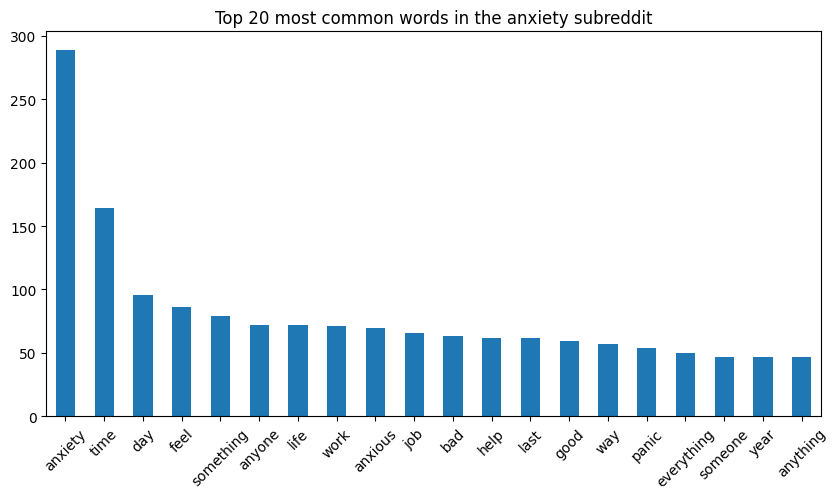

In [59]:
from wordcloud import WordCloud

anxiety_freq = pd.Series(anxiety_final_words).value_counts()
anxiety_freq[:20].plot(kind='bar', title='Top 20 most common words in the anxiety subreddit', figsize=(10,5))
plt.xticks(rotation=45)
plt.show()

- 각 게시판 마다 게시판 이름(ptsd, relationships, anxiety) 단어가 상위권에 존재
- time, day, feel, bad, good 이란 단어는 모든 게시판마다 공통적으로 등장
- relationship 게시판은 인간관계 관련 게시판이라 그런지 family, friend, talk, person과 같은 사람과 관련된 단어 많이 등장
- ptsd, anxiety 게시판에서는 anxious, anxiety와 같은 심리적 표현 단어 등장